<a href="https://colab.research.google.com/github/Swapn2/deep_learning/blob/main/CAT_dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
zip_ref = zipfile.ZipFile('/content/archive.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense , Conv2D , MaxPooling2D, Flatten

In [4]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/training_set/training_set',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)

    )

Found 8005 files belonging to 2 classes.


In [6]:
# generators
test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test_set/test_set',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)

    )

Found 2023 files belonging to 2 classes.


In [ ]:
train_ds

In [7]:
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image , label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [8]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3) , padding = 'valid' , activation = 'relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3,3) , padding = 'valid' , activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3,3) , padding = 'valid' , activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(63, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 63)             │         8,127 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            64 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,167 (56.64 MB)

 Trainable params: 14,847,167 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [11]:
history = model.fit(train_ds , epochs = 10, validation_data=test_ds)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 31s 90ms/step - accuracy: 0.5254 - loss: 0.7627 - val_accuracy: 0.6130 - val_loss: 0.6572
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - accuracy: 0.6299 - loss: 0.6408 - val_accuracy: 0.6802 - val_loss: 0.6189
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 69ms/step - accuracy: 0.6973 - loss: 0.5845 - val_accuracy: 0.6915 - val_loss: 0.6284
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.7760 - loss: 0.4657 - val_accuracy: 0.6777 - val_loss: 0.9761
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 18s 67ms/step - accuracy: 0.8585 - loss: 0.3219 - val_accuracy: 0.6901 - val_loss: 1.1176
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 69ms/step - accuracy: 0.9258 - loss: 0.1744 - val_accuracy: 0.6935 - val_loss: 1.5050
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.9659 - loss: 0.1071 - val_accuracy: 0.6777 - val_loss: 1.5720
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 69ms/step - accuracy: 0.9708 - loss: 0.0776 - 

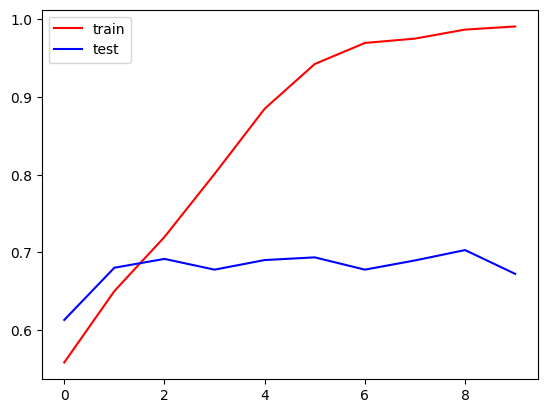

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'test')
plt.legend()
plt.show()

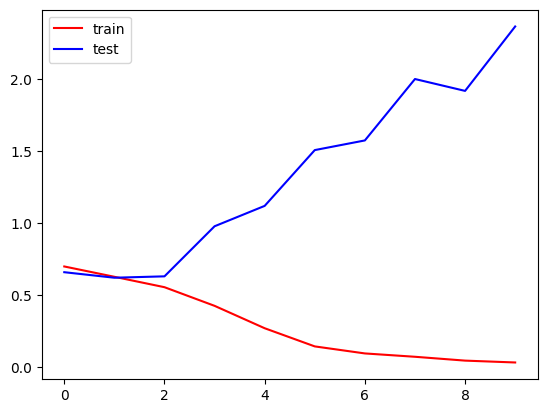

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'test')
plt.legend()
plt.show()